In [2]:
#import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [4]:
headers = requests.utils.default_headers()
headers.update({
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
})

In [6]:
base_url = 'https://search.savills.com/list/property-for-sale/england/cheshire/page/'

In [8]:
data=[]

for i in range(1,10):
    url=f'{base_url}{i}'

    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')

    listings = soup.find_all('li', class_ = 'sv-results-listing__item')

    for listing in listings:
        price_span = listing.find('span', class_ = 'sv-property-price__value')
        if price_span:
            price = price_span.find_all('span')[1].get_text(strip=True).replace(',','').replace('£','')
        else: price = None
        
        location_p = listing.find('p', class_='sv-details__address2')
        if location_p:
            location = location_p.get_text(strip=True)
        else: location = None
        
        property_type_div = listing.find('div', class_ = 'sv-property-attribute sv--residential')
        if property_type_div:
            property_type = property_type_div.find('span',class_='sv-property-attribute__value')['title']
        else: property_type = None
        
        bedrooms_div = listing.find('div', class_ = 'sv-property-attribute sv--bedrooms')
        if bedrooms_div:
            bedrooms = bedrooms_div.find('span',class_='sv-property-attribute__value')['title']
        else: bedrooms = None

        bathrooms_div = listing.find('div', class_ = 'sv-property-attribute sv--bathrooms')
        if bathrooms_div:
            bathrooms = bathrooms_div.find('span',class_='sv-property-attribute__value')['title']
        else: bathrooms = None
            
        receptions_div = listing.find('div', class_ = 'sv-property-attribute sv--receptions')
        if receptions_div:
            receptions = receptions_div.find('span',class_='sv-property-attribute__value')['title']
        else: receptions = None
        
        sqft_div = listing.find('div', class_ = 'sv-property-attribute sv--size')
        if sqft_div:
            sqft = sqft_div.find('span',class_='sv-property-attribute__value')['title'].split('s')[0].strip().replace(',','')
        else: sqft = None
    
        data.append({
            'Price': price,
            'Location': location,
            'Type': property_type,
            'Bedrooms': bedrooms,
            'Bathrooms': bathrooms,
            'Receptions': receptions,
            'Sqft': sqft
        })

df = pd.DataFrame(data)
df

,Price,Location,Type,Bedrooms,Bathrooms,Receptions,Sqft
0,2500000,"Sutton, Macclesfield, Cheshire, SK11 0NN",None,6,3,5,2758
1,925000,"Chorlton-by-Backford, Chester, Cheshire, CH2 4DF",House,4,2,3,2720
2,1100000,"Chorlton-by-Backford, Chester, CH2 4DH",House,6,4,4,3426
3,None,None,None,None,None,None,None
4,1500000,"Lymm, Cheshire, WA13 0RD",House,4,4,2,3900
...,...,...,...,...,...,...,...
144,1250000,"Norley, Frodsham, Cheshire, WA6 6EU",House,5,5,3,3293
145,1890000,"Styal, Wilmslow, Cheshire, SK9 4JE",House,6,3,3,7734
146,2750000,"Alderley Edge, Cheshire, SK9 7DB",House,5,4,4,4805
147,1800000,"Malpas, Cheshire, SY14 7LB",House,5,4,4,4353


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       148 non-null    object
 1   Location    148 non-null    object
 2   Type        143 non-null    object
 3   Bedrooms    144 non-null    object
 4   Bathrooms   144 non-null    object
 5   Receptions  144 non-null    object
 6   Sqft        141 non-null    object
dtypes: object(7)
memory usage: 8.3+ KB


In [14]:
df.dropna(inplace = True)

In [18]:
df['Price'] = df['Price'].astype('int')
df['Location'] = df['Location'].astype('string')
df['Type'] = df['Type'].astype('string')
df['Bedrooms'] = df['Bedrooms'].astype('int')
df['Bathrooms'] = df['Bathrooms'].astype('int')
df['Receptions'] = df['Receptions'].astype('int')
df['Sqft'] = df['Sqft'].astype('int')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 1 to 148
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       140 non-null    int32 
 1   Location    140 non-null    string
 2   Type        140 non-null    string
 3   Bedrooms    140 non-null    int32 
 4   Bathrooms   140 non-null    int32 
 5   Receptions  140 non-null    int32 
 6   Sqft        140 non-null    int32 
dtypes: int32(5), string(2)
memory usage: 6.0 KB


In [22]:
df['Type'].unique()

<StringArray>
['House', 'Bungalow', 'New development']
Length: 3, dtype: string

In [26]:
df.describe()

,Price,Bedrooms,Bathrooms,Receptions,Sqft
count,1.400000e+02,140.000000,140.000000,140.000000,140.000000
mean,1.374000e+06,4.485714,3.292857,3.264286,3455.642857
std,9.754241e+05,1.069429,1.365012,1.306380,2115.448722
min,3.500000e+05,2.000000,1.000000,1.000000,809.000000
25%,8.000000e+05,4.000000,2.000000,2.000000,2093.500000
50%,1.075000e+06,4.000000,3.000000,3.000000,2976.000000
75%,1.675000e+06,5.000000,4.000000,4.000000,4358.500000
max,8.000000e+06,8.000000,8.000000,8.000000,14711.000000


In [24]:
 df

,Price,Location,Type,Bedrooms,Bathrooms,Receptions,Sqft
1,925000,"Chorlton-by-Backford, Chester, Cheshire, CH2 4DF",House,4,2,3,2720
2,1100000,"Chorlton-by-Backford, Chester, CH2 4DH",House,6,4,4,3426
4,1500000,"Lymm, Cheshire, WA13 0RD",House,4,4,2,3900
5,975000,"Adlington, Macclesfield, Cheshire, SK10 4NT",House,3,2,3,3300
6,775000,"Alderley Edge, Cheshire, SK9 7GT",House,4,2,2,1573
...,...,...,...,...,...,...,...
144,1250000,"Norley, Frodsham, Cheshire, WA6 6EU",House,5,5,3,3293
145,1890000,"Styal, Wilmslow, Cheshire, SK9 4JE",House,6,3,3,7734
146,2750000,"Alderley Edge, Cheshire, SK9 7DB",House,5,4,4,4805
147,1800000,"Malpas, Cheshire, SY14 7LB",House,5,4,4,4353


In [28]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [40]:
df2 = df.drop(columns = ['Location','Type'])

In [42]:
scaler = StandardScaler()

In [44]:
df2[['Price_T','Bedrooms_T','Bathrooms_T','Receptions_T','Sqft_T']] = scaler.fit_transform(df2[['Price','Bedrooms','Bathrooms','Receptions','Sqft']])

In [46]:
df2

,Price,Bedrooms,Bathrooms,Receptions,Sqft,Price_T,Bedrooms_T,Bathrooms_T,Receptions_T,Sqft_T
1,925000,4,2,3,2720,-0.461965,-0.455812,-0.950541,-0.203030,-0.348997
2,1100000,6,4,4,3426,-0.281912,1.421060,0.519909,0.565192,-0.014063
4,1500000,4,4,2,3900,0.129638,-0.455812,0.519909,-0.971253,0.210808
5,975000,3,2,3,3300,-0.410522,-1.394247,-0.950541,-0.203030,-0.073839
6,775000,4,2,2,1573,-0.616297,-0.455812,-0.950541,-0.971253,-0.893145
...,...,...,...,...,...,...,...,...,...,...
144,1250000,5,5,3,3293,-0.127581,0.482624,1.255134,-0.203030,-0.077159
145,1890000,6,3,3,7734,0.530900,1.421060,-0.215316,-0.203030,2.029697
146,2750000,5,4,4,4805,1.415734,0.482624,0.519909,0.565192,0.640149
147,1800000,5,4,4,4353,0.438301,0.482624,0.519909,0.565192,0.425715


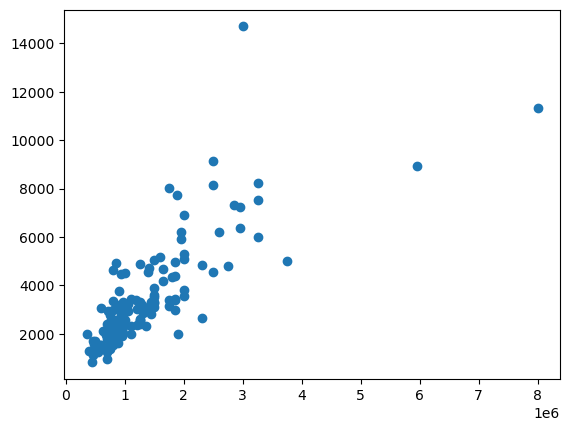

In [70]:
plt.scatter(data=df2, x = 'Price', y = 'Sqft')

In [48]:
def optimise_k_means(df, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

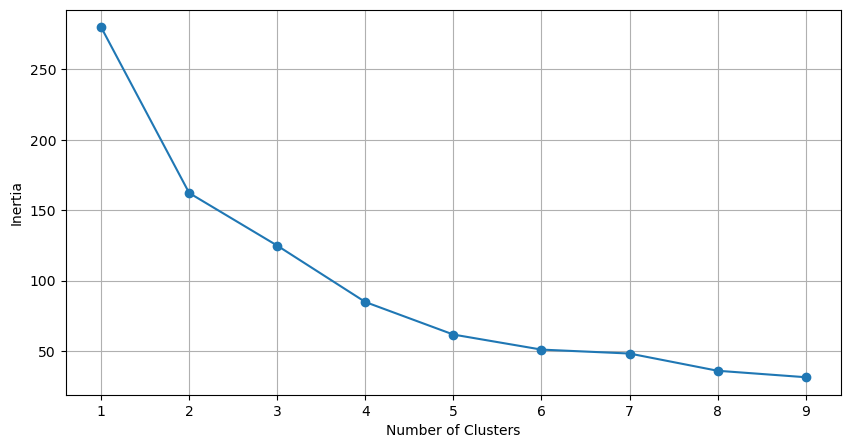

In [60]:
optimise_k_means(df2[['Price_T', 'Receptions_T']], 10)

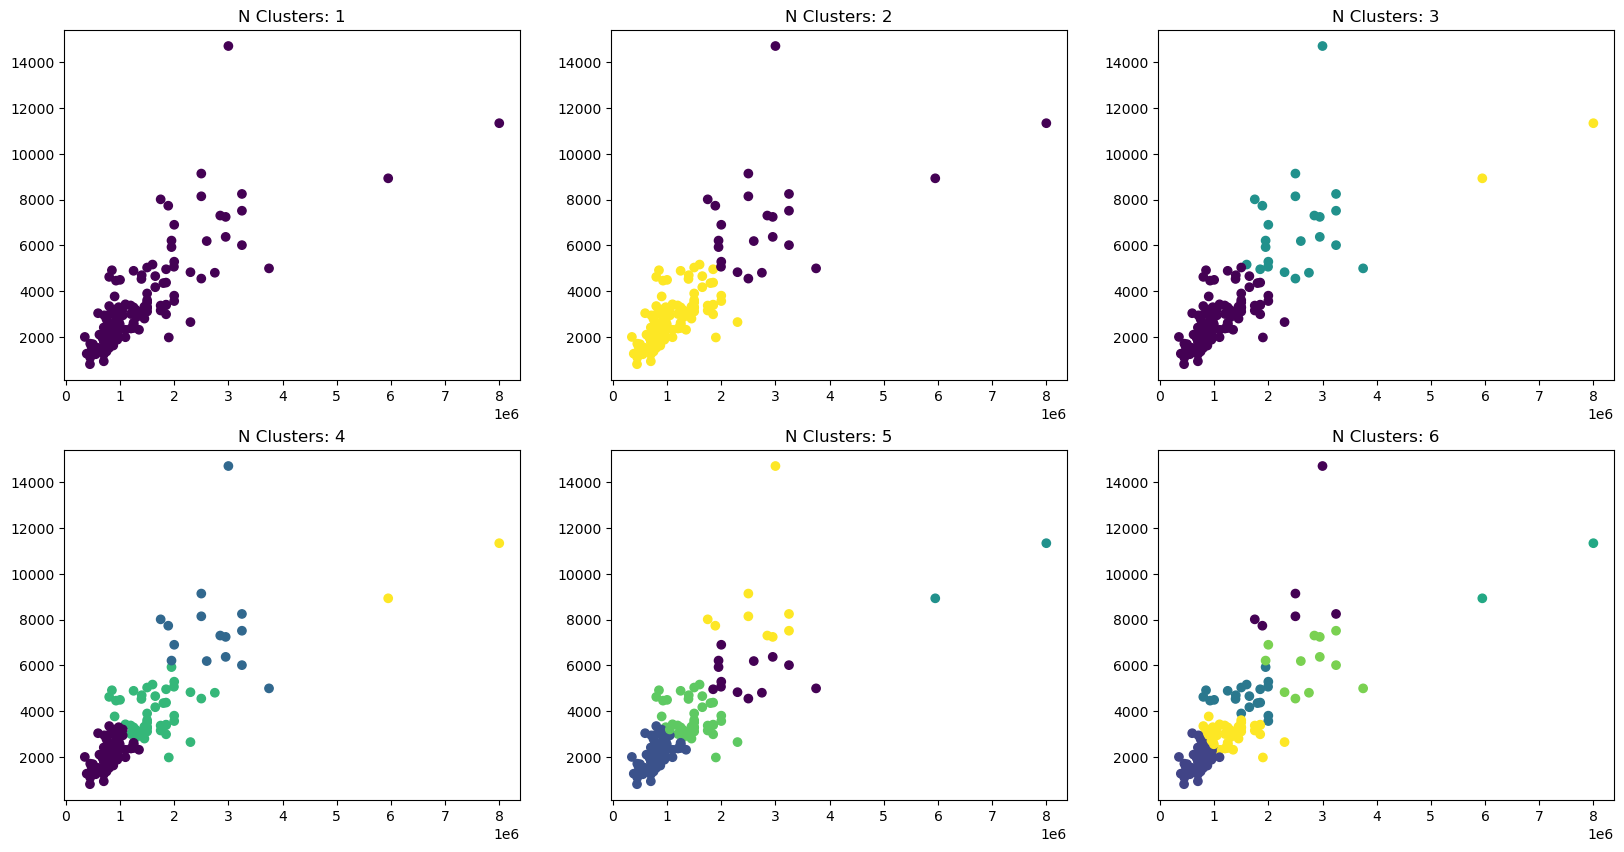

In [124]:
for k in range(1,7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2[['Price_T','Sqft_T']])
    df2[f'KMeans_{k}'] = kmeans.labels_

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df2['Price'], y=df2['Sqft'], c=df2[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')

In [126]:
df2

,Price,Bedrooms,Bathrooms,Receptions,Sqft,Price_T,Bedrooms_T,Bathrooms_T,Receptions_T,Sqft_T,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6
1,925000,4,2,3,2720,-0.461965,-0.455812,-0.950541,-0.203030,-0.348997,0,1,0,0,1,5
2,1100000,6,4,4,3426,-0.281912,1.421060,0.519909,0.565192,-0.014063,0,1,0,2,3,5
4,1500000,4,4,2,3900,0.129638,-0.455812,0.519909,-0.971253,0.210808,0,1,0,2,3,2
5,975000,3,2,3,3300,-0.410522,-1.394247,-0.950541,-0.203030,-0.073839,0,1,0,0,3,5
6,775000,4,2,2,1573,-0.616297,-0.455812,-0.950541,-0.971253,-0.893145,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1250000,5,5,3,3293,-0.127581,0.482624,1.255134,-0.203030,-0.077159,0,1,0,2,3,5
145,1890000,6,3,3,7734,0.530900,1.421060,-0.215316,-0.203030,2.029697,0,0,1,1,4,0
146,2750000,5,4,4,4805,1.415734,0.482624,0.519909,0.565192,0.640149,0,0,1,2,0,4
147,1800000,5,4,4,4353,0.438301,0.482624,0.519909,0.565192,0.425715,0,1,0,2,3,2
